In [1]:
# Зависимости
import numpy
import pandas
import matplotlib.pyplot
import sklearn
from sklearn import cluster
from sklearn import datasets

In [2]:
# Сформируем тестовый набор данных из 5000 записей, каждая из которых имеет две координаты.
# При этом полученный набор данных будет иметь 4 явно выраженных кластера.
test_x, test_y = datasets.make_blobs(n_samples = 5000, n_features = 2, centers = 4)

In [3]:
# Приведем полученный набор данных к формату pandas.DataFrame
x = pandas.DataFrame(test_x)
print(x)

             0         1
0    -6.599859 -0.341733
1    -1.497834 -3.472978
2     7.897920  8.172426
3    -0.781461 -2.787413
4     9.740169  7.855761
...        ...       ...
4995 -2.575050 -3.913759
4996 -2.273216 -3.258345
4997 -2.612145 -4.662231
4998 -2.039357 -5.111898
4999 -2.790273 -4.591963

[5000 rows x 2 columns]


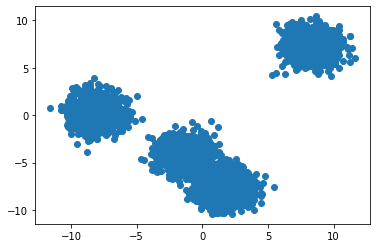

In [4]:
# Отобразим полученный набор данных в виде точек на плоскости
matplotlib.pyplot.scatter(x[0], x[1])
matplotlib.pyplot.show()

In [5]:
# Теперь запустим алгоритм k-средних, указав число кластеров, которое нам изначально известно
kmeans = sklearn.cluster.KMeans(n_clusters = 4)
y = kmeans.fit_predict(x)

# Выведем значение инерции (именно оно минимизируется при использовании алгоритма k-средних)
print(kmeans.inertia_)

9856.143112252745


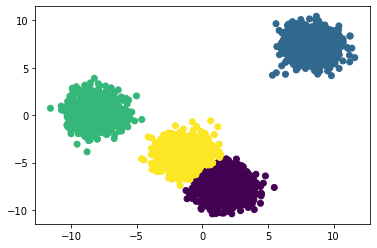

In [6]:
# Отобразим набор данных, используя разные цвета для разных кластеров
matplotlib.pyplot.scatter(x[0], x[1], c = y)
matplotlib.pyplot.show()    

In [7]:
# Загрузите файл "worldcities.csv" в DataFrame.

# Сформируйте новый DataFrame из столбцов 'lng' и 'lat' оригинального DataFrame.
dataframe = pandas.read_csv("datasets/worldcities.csv")


In [8]:
# Сформируйте новый DataFrame из столбцов 'lng' и 'lat' оригинального DataFrame.
dataframe['lng']
dataframe['lat']
dataframe

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Malishevë,Malisheve,42.4822,20.7458,Kosovo,XK,XKS,Malishevë,admin,NaN,1901597212
1,Prizren,Prizren,42.2139,20.7397,Kosovo,XK,XKS,Prizren,admin,NaN,1901360309
2,Zubin Potok,Zubin Potok,42.9144,20.6897,Kosovo,XK,XKS,Zubin Potok,admin,NaN,1901608808
3,Kamenicë,Kamenice,42.5781,21.5803,Kosovo,XK,XKS,Kamenicë,admin,NaN,1901851592
4,Viti,Viti,42.3214,21.3583,Kosovo,XK,XKS,Viti,admin,NaN,1901328795
...,...,...,...,...,...,...,...,...,...,...,...
12954,Sturgis,Sturgis,44.4111,-103.4975,United States,US,USA,South Dakota,NaN,6862.0,1840002174
12955,Tea,Tea,43.4515,-96.8346,United States,US,USA,South Dakota,NaN,5415.0,1840002841
12956,Brandon,Brandon,43.5928,-96.5799,United States,US,USA,South Dakota,NaN,9263.0,1840002650
12957,Madison,Madison,44.0062,-97.1084,United States,US,USA,South Dakota,NaN,6983.0,1840002540


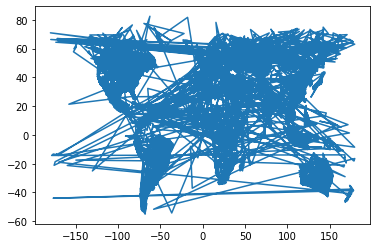

In [9]:
# Отобразите полученный DataFrame в виде точек, где координаты по оси X берутся из столбца 'lng', а координаты по оси Y - из столбца 'lat'.
x=dataframe['lng']
y=dataframe['lat']
matplotlib.pyplot.plot(x,y)

In [10]:
# Создайте пустой список inertia для хранения результатов вычислительных экмпериментов.
inertia=lst=[[]]
x=x.values.reshape(-1,1)# выполнить один раз, а потом убрать
x.shape
x

array([[  20.7458],
       [  20.7397],
       [  20.6897],
       ...,
       [ -96.5799],
       [ -97.1084],
       [-103.8564]])

In [11]:
# Напишите цикл по количеству кластеров от 1 до 10.
# В цикле запускайте алгоритм k-средних с текущим количеством кластеров,
# добавляйте в список inertia значение для текущего результата работы алгоритма,
# отобразите набор данных, используя разные цвета для разных кластеров.
# Все шаги делайте по аналогии с примером выше.

In [12]:
for i in range(1,10):
  kmeans = sklearn.cluster.KMeans(n_clusters = i)
  y = kmeans.fit_predict(x)
  inertia.insert(i, y)

(12959,)

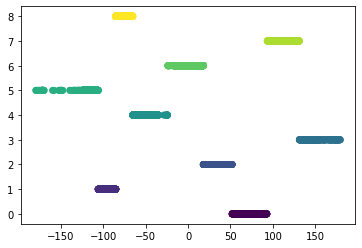

In [13]:
matplotlib.pyplot.scatter(x,y,c=y)
y.shape

In [14]:
# Постройте график изменения величины inertia от количества кластеров.

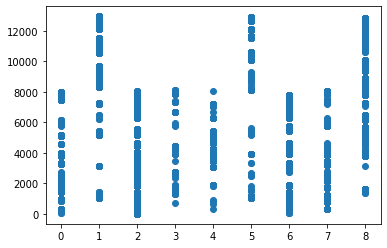

In [15]:
matplotlib.pyplot.scatter(y,range(0,12959))